<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Correllation Analysis | Relationship Between Variables</h1>

---

<h1 style=' font-weight: 600; font-size: 18px; text-align: left'>1.0. Import Required Libraries</h1>

In [12]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import warnings 
import math

warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
print("......Libraries Loaded Successfully.........")

......Libraries Loaded Successfully.........


<h1 style='font-weight: 600; font-size: 18px; text-align: left'>2.0. Import and Preprocessing Dataset</h1>

In [13]:
filepath = "../Datasets/Eggplant Fusarium Fresistance Data.csv"
df = pd.read_csv(filepath)
display(df)

,Variety,Resistance Level,Replication ID,Infection Severity (%),...,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-R1,Resistant,1,22.50,...,88.90,21,88.80,23.40
1,EP-R1,Resistant,2,27.90,...,82.20,19,87.70,21.70
2,EP-R1,Resistant,3,21.20,...,74.70,17,84.90,27.20
3,EP-R1,Resistant,4,15.50,...,93.80,18,90.30,15.00
4,EP-R1,Resistant,5,17.30,...,78.10,19,87.00,23.00
...,...,...,...,...,...,...,...,...,...
795,EP-S3,Susceptible,96,75.20,...,68.20,7,6.40,85.50
796,EP-S3,Susceptible,97,74.80,...,59.50,4,27.20,82.00
797,EP-S3,Susceptible,98,58.10,...,78.80,7,30.80,75.40
798,EP-S3,Susceptible,99,54.10,...,63.70,7,24.10,81.80


<h1 style='font-weight: 600; font-size: 18px; text-align: left'>3.0. Correllation Analysis | Relationship Between Variables</h1>

<h4 style='font-size: 15px;  font-weight: 600'>3.1: Correlation Coefficients</h4>

In [3]:
def compute_correlation_matrix(df, method="pearson", visualize=True):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    return corr_matrix


correlation_matrix = compute_correlation_matrix(df, method="pearson")
correlation_matrix

,Replication ID,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
Replication ID,1.00,0.02,0.01,0.04,-0.02,-0.01,-0.00
Infection Severity (%),0.02,1.00,0.88,-0.81,-0.89,-0.91,0.90
Wilt index,0.01,0.88,1.00,-0.80,-0.89,-0.90,0.88
Plant height (cm),0.04,-0.81,-0.80,1.00,0.81,0.83,-0.81
Days to wilt symptoms,-0.02,-0.89,-0.89,0.81,1.00,0.91,-0.90
Survival rate (%),-0.01,-0.91,-0.90,0.83,0.91,1.00,-0.92
Disease incidence (%),-0.00,0.90,0.88,-0.81,-0.90,-0.92,1.00


<h4 style='font-size: 15px;  font-weight: 600'>3.2: Correlation Coefficients Heatmap </h4>

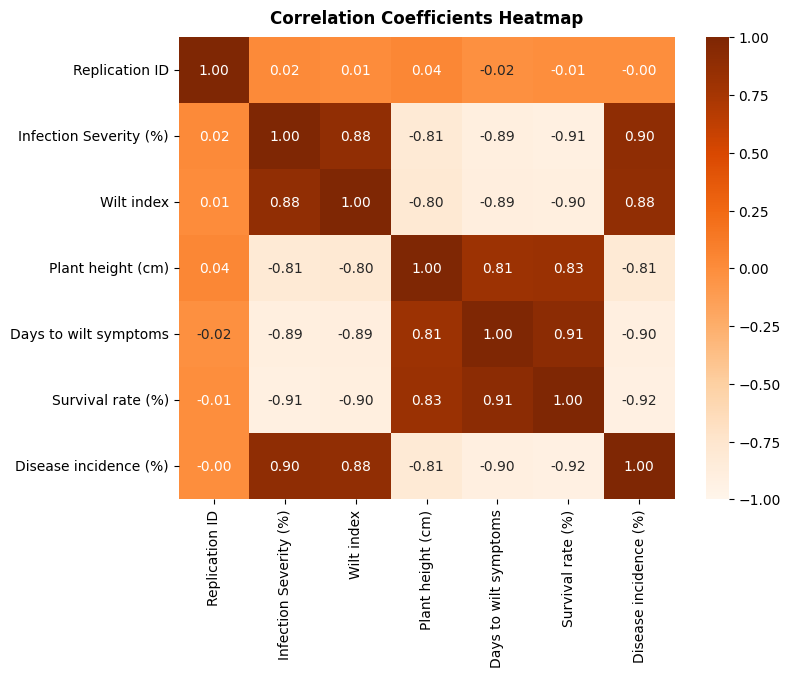

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Coefficients Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h4 style='font-size: 15px;  font-weight: 600'>3.3: Pearson’s </h4>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [8]:
def compute_pearson_r(df, numerical_columns):
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
pearson_results_df = compute_pearson_r(df, numerical_columns=Metrics)
pearson_results_df

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,Infection Severity (%),Wilt index,0.88,0.00,Positive,Strong
1,Infection Severity (%),Plant height (cm),-0.81,0.00,Negative,Strong
2,Infection Severity (%),Days to wilt symptoms,-0.89,0.00,Negative,Strong
3,Infection Severity (%),Survival rate (%),-0.91,0.00,Negative,Strong
4,Infection Severity (%),Disease incidence (%),0.90,0.00,Positive,Strong
5,Wilt index,Plant height (cm),-0.80,0.00,Negative,Strong
6,Wilt index,Days to wilt symptoms,-0.89,0.00,Negative,Strong
7,Wilt index,Survival rate (%),-0.90,0.00,Negative,Strong
8,Wilt index,Disease incidence (%),0.88,0.00,Positive,Strong
9,Plant height (cm),Days to wilt symptoms,0.81,0.00,Positive,Strong


<h4 style='font-size: 15px;  font-weight: 600'>3.4: Relationship Between Variables (Scatterplot Matrix)</h4>


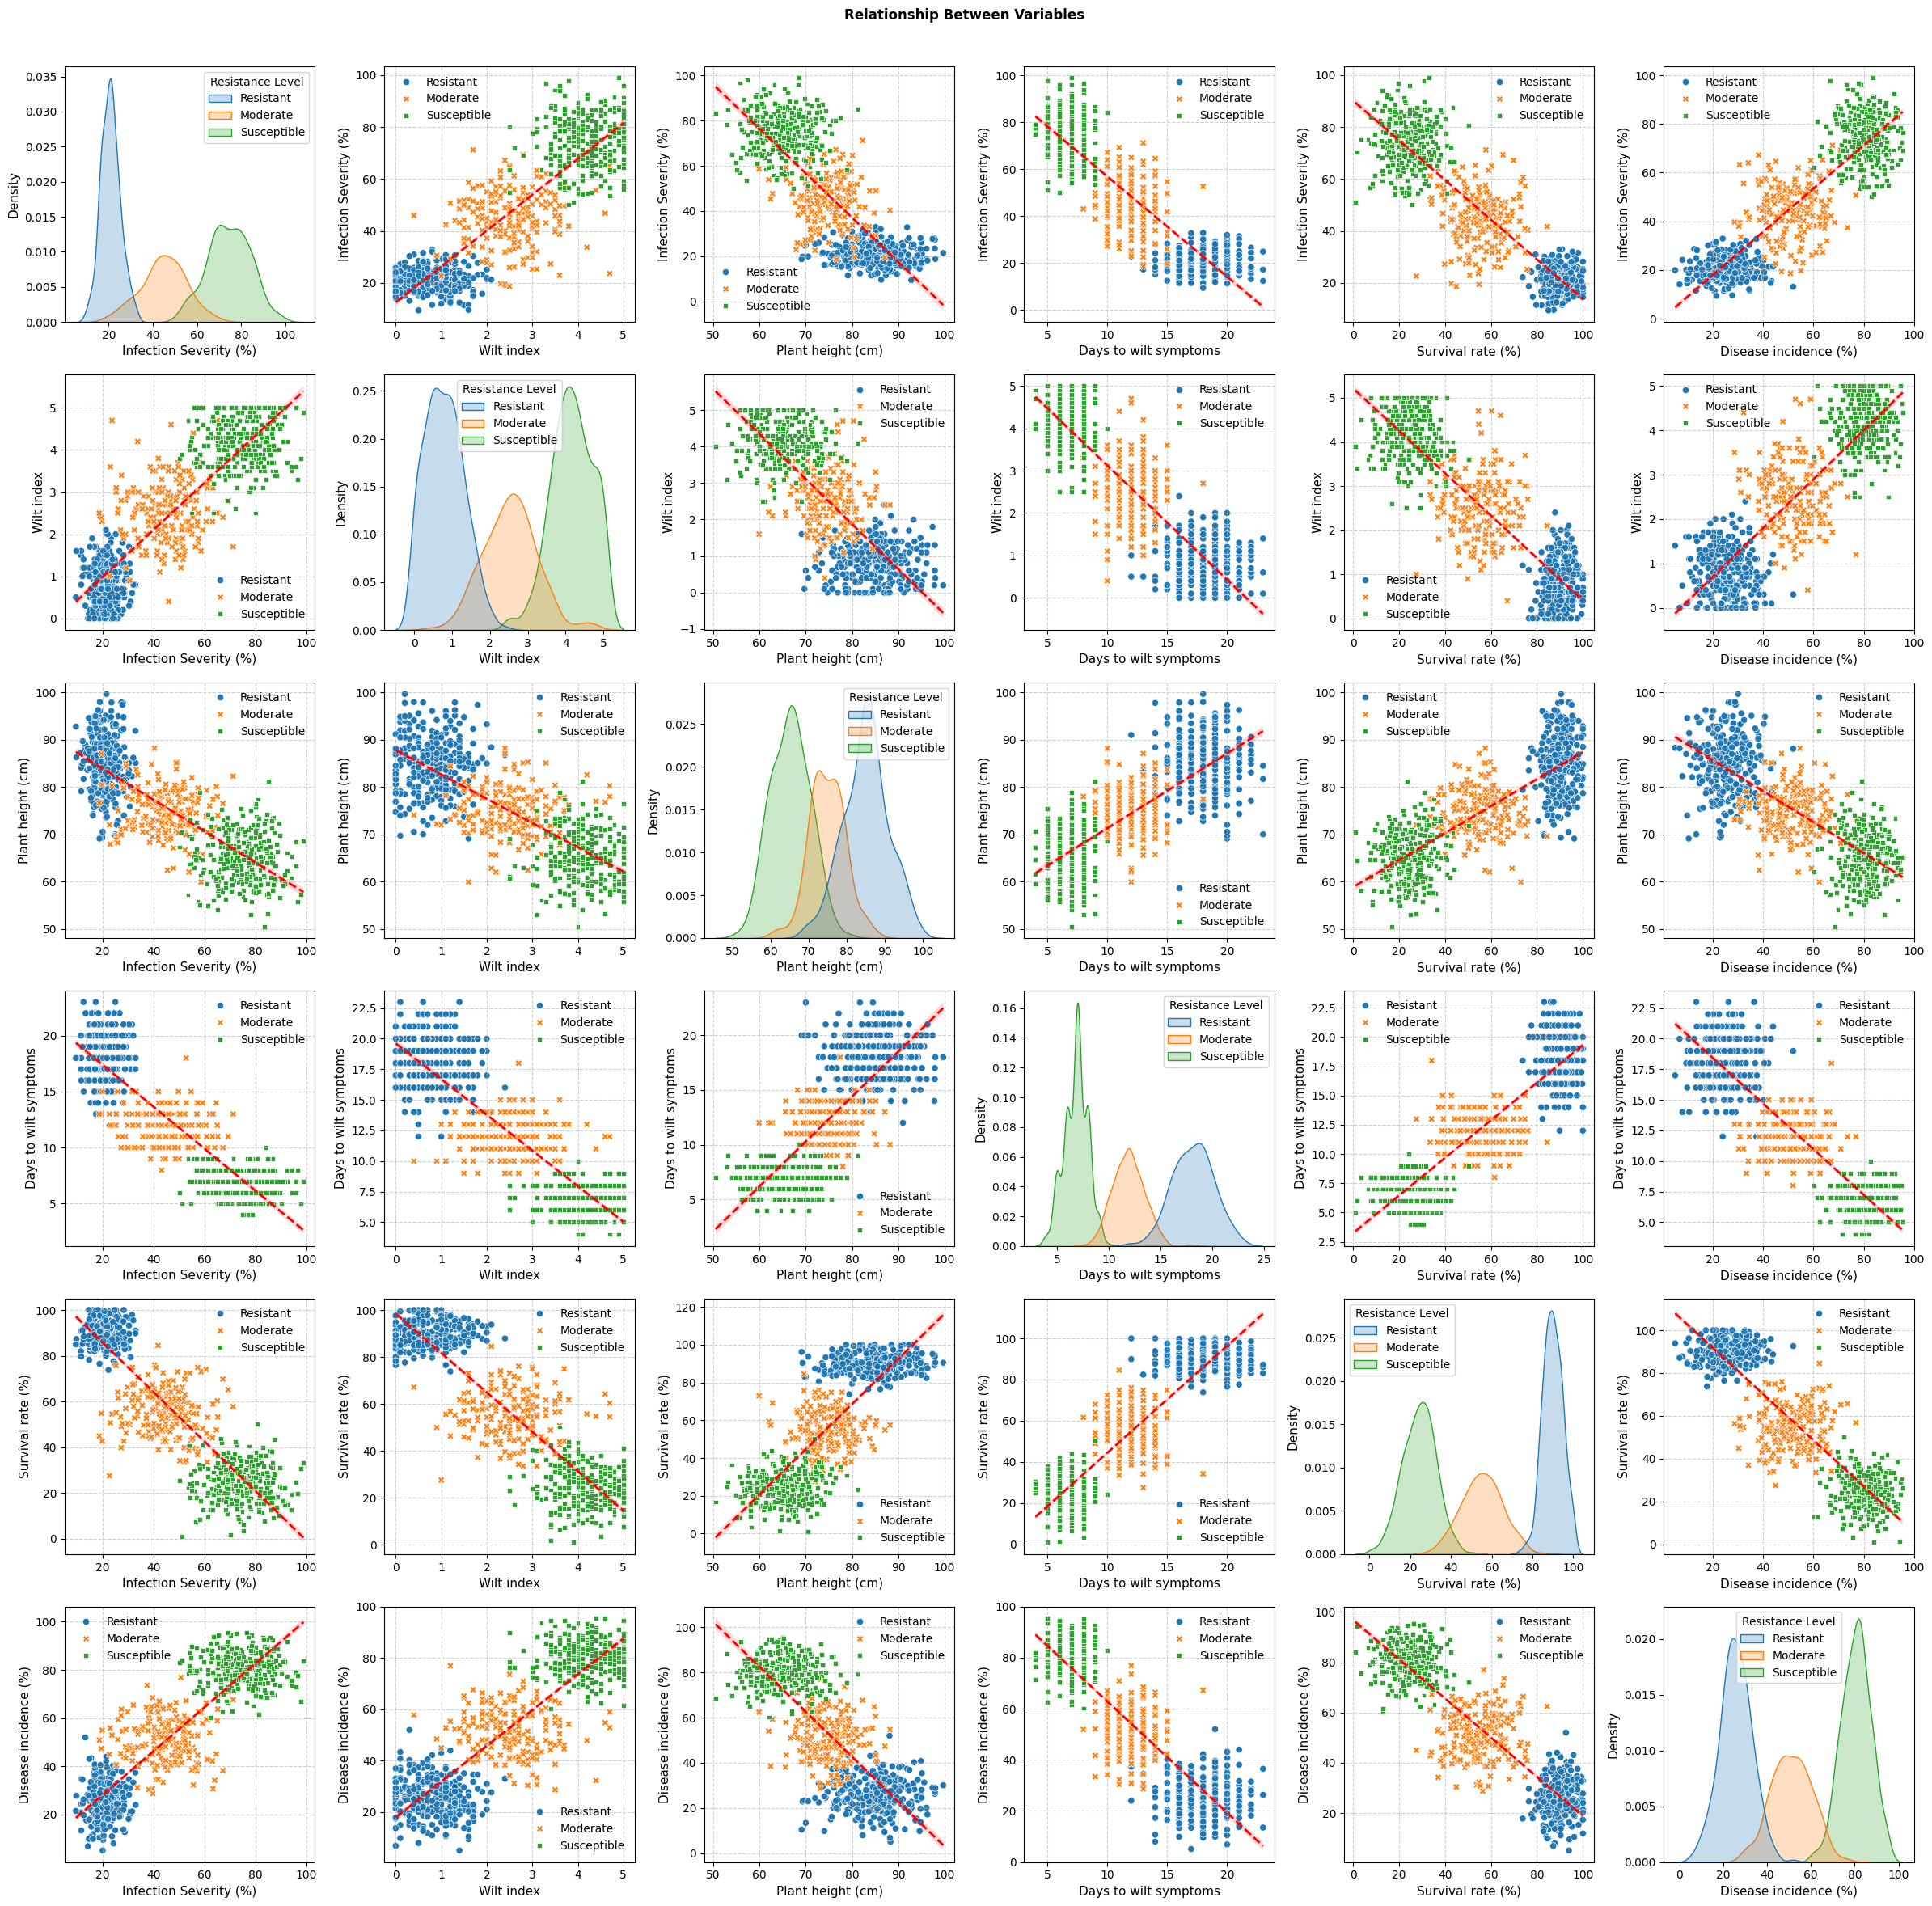

In [11]:

def scatterplot_matrix(data, Variables, group, title):
    num_variables = len(Variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle(title, fontsize=12, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Variables[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Variables[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                sns.scatterplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax, hue=group, style=group, alpha=1)
                sns.regplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel(Variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

title = "Relationship Between Variables "
Variables = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
scatterplot_matrix(df, Variables, group='Resistance Level', title=title)

In [9]:
title = "Relationship Between Variables "
Variables = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
scatterplot_matrix(df, Variables, group='Variety', title=title)

,Variety,Resistance Level,Replication ID,Infection Severity (%),...,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-R1,Resistant,1,22.50,...,88.90,21,88.80,23.40
1,EP-R1,Resistant,2,27.90,...,82.20,19,87.70,21.70
2,EP-R1,Resistant,3,21.20,...,74.70,17,84.90,27.20
3,EP-R1,Resistant,4,15.50,...,93.80,18,90.30,15.00
4,EP-R1,Resistant,5,17.30,...,78.10,19,87.00,23.00
...,...,...,...,...,...,...,...,...,...
795,EP-S3,Susceptible,96,75.20,...,68.20,7,6.40,85.50
796,EP-S3,Susceptible,97,74.80,...,59.50,4,27.20,82.00
797,EP-S3,Susceptible,98,58.10,...,78.80,7,30.80,75.40
798,EP-S3,Susceptible,99,54.10,...,63.70,7,24.10,81.80


---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

----

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>



<h5 style='font-size: 55px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>
